# Team Homework 7: Hypotheses and A/B Testing

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 

This homework covers the topics in Lecture 17: Comparing distributions, Lecture 18: Decisions and Uncertainty, Lecture 19: A/B Testing and Lecture 20: Causality

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Testing Hypotheses](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)
- [p-Value](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html)
- [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Null and Alternative Hypotheses

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called hypotheses.

The `null hypothesis` says that the data were generated at random under clearly specified assumptions about the randomness. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data. The `alternative hypothesis` says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

Identify the Null and Alternative hypotheses in the following scenarios. 

a) A study was conducted to see if a new Covid-19 vaccine reduces the risk of contracting the virus. Assume the risk of contracting Covid-19 without vaccine was 20% in the target population. 

b) During the 2010 World Cup tournament, Paul the Octopus (in a German aquarium) became famous for correctly predicting the winner in all 8 games it was asked to predict.  (Two containers of food were lowered into Paul’s tank, each with a flag of the opposing teams.  He made a selection by choosing which container to eat from. Is this evidence that Paul has psychic powers and can choose correctly more than half the time?

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("pc0FLC8H7D8")

c) In an experiment, students were given words to memorize, then were randomly assigned to either take a 90 minute nap or take a caffeine pill.  A couple hours later, they were tested on their recall ability.  We wish to test to see if the sample provides evidence that there is a difference in mean number of words people can recall depending on whether they take a nap or have some caffeine.  



d) In 1980 and again in 2010, a Gallup poll asked a random sample of 1000 US citizens people “Are you in favor of the death penalty for a person convicted of murder?”.  In 1980, the proportion saying yes was 0.66.  In 2010, it was 0.64.  Does this data provide evidence that the proportion of US citizens favoring the death penalty was higher in 1980 than it was in 2010?  

### Total Variantion Distance

A way to compare two categorical distributions is to use the Total Variation Distance (TVD), as seen from the following code:

In [3]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

Based on this definition of `tvd`, what is the Total Variation Distance between the actual outcomes and a fair die if we rolled a die 100 times, and observed the following proportions? $(0.13, 0.12, 0.18, 0.17, 0.21, 0.19)$

Although the order of `dist1` and `dist2` does not matter, in the examples from lecture, typically `dist1` is simulated from `sample_proportions`, while `dist2` is the expected proportions from the categorical distribution according to the null hypothesis. The larger the value of `tvd`, the more the two distributions disagree with each other. For example, if we roll a fair 6-sided die 100 times, and repeat this experiment over and over, we can observed the histogram of the `tvd`. 

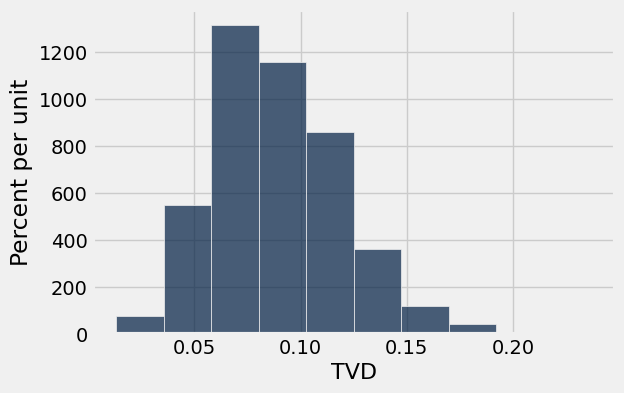

In [11]:
fair_die = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
fair_results = make_array()
for i in np.arange(10000):
    tvd_stat = tvd(sample_proportions(100, fair_die), fair_die)
    fair_results = np.append(fair_results, tvd_stat)
Table().with_column('TVD', fair_results).hist()

Now consider a loaded die that makes the larger numbers more likely. This would generate a different histogram for the same test statistic. 

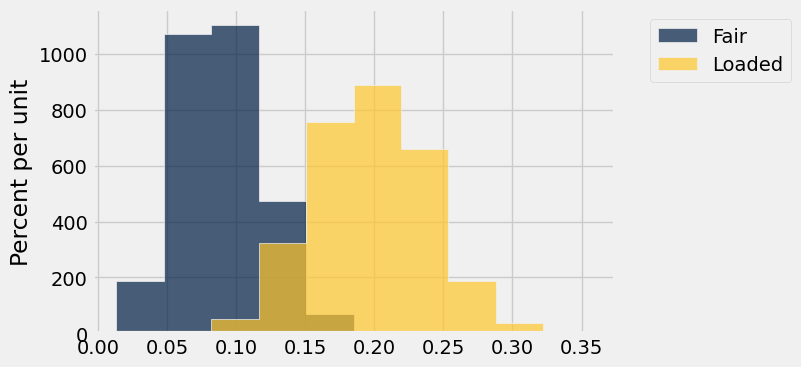

In [12]:
loaded_die = make_array(1/12, 1/12, 1/6, 1/6, 1/4, 1/4)
loaded_results = make_array()
for i in np.arange(10000):
    tvd_stat = tvd(sample_proportions(100, loaded_die), fair_die)
    loaded_results = np.append(loaded_results, tvd_stat)
Table().with_columns('Fair', fair_results, 'Loaded', loaded_results).hist()

Much of the statistical decision making is about how to say a value from the second histogram is unlikely to come from the first one. This is quantified by the so-called `P-value`. 

### Errors in Decisions

For the scenario (a) in the problem above, discuss what wrong conclusions (decisions error) are possible. You may refer to Section 11.4 of the textbook: [Error Probabilities](https://inferentialthinking.com/chapters/11/4/Error_Probabilities.html) for a review.  |


In [1]:
from datascience import *
Table.read_table('decision_errors.csv')

Unnamed: 0,Test Favors the Null,Test Favors the Alternative
Null is True,Correct result,Error
Alternative is True,Error,Correct result


### Simulating p-value

According to Lecture 17: comparing distributions, in the story of Paul the Octopus mentioned above, what is an appropriate statistic for measuring the discrepancy between the model and data? (Hint: you can also check the code below)

The following code simulates how one picks the winner by flipping a fair coin. Run the code and use it to estimate the P-value for Paul Octopus' sample statistic. 

In [ ]:
import numpy as np
from datascience import *
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

guess = make_array('winner', 'loser')
def one_octopus():
    eight_guesses = np.random.choice(guess, 8)
    return np.count_nonzero(eight_guesses == 'winner') / 8
many_octopi = make_array()
for i in np.arange(1000):
    many_octopi = np.append(many_octopi, one_octopus())
    
results = Table().with_columns('Success', many_octopi)
results.hist(bins=np.arange(-0.125, 1.125, 0.125))

Suppose a different and less psychically powerful octopus named "Polly" only got 6 correct out of 8.  Will the p-value be more than or less than the p-value for Paul the Octopus? Estimate this new p-value using the same sampling distribution shown above. (Note: you do not need to run the code again)

Suppose the 5% cutoff for the p-value is used to decide whether Paul and Polly are psychic. What should the decisions be? 

### Finding P-value in A/B Testing

In the experiment (c) mentioned above, the test statistic was set to be the difference in the mean number of words recalled by people who take a nap ($\bar{x}_1$) and the ones by those who took a caffeine pill ($\bar{x}_2$). Similar to the example used in the A/B testing lecture, here the null hypothesis assumes that the two groups have the same population mean. 

<img src="two_means_diff_1000samples.GIF" alt="drawing" width="600"/>


What is the P-value if the observed difference in the original sample is 3.5 words? 

What is the P-value if the observed difference in the original sample is 3.0 words? 

### Permutation Test 

The following data records an experiment on whether Lithium was effective in preventing cocaine users from relapsing. In the column labeled "Result", 1 represents relapse (returning to cocaine use), and 0 presents no relapse. 

In [70]:
coke = Table().read_table('cocaine_lithium.csv')
coke.pivot('Result', 'Group')

Group,0,1
Lithium,10,14
Placebo,7,20


In the lecture, the following `distance` function was used to calculate the absolute value of the difference in proportions of relapses between the two groups. Based on values shown in the pivot table shown above, can you write an arithmetic expression that generates the same output as the `distance` function? 

In [73]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

distance(coke, 'Group')

0.15740740740740733

In [ ]:
# your expression that uses the values in the pivot table to generate the same number as above




The code below uses a similar technique as in Lecture 20: Causality to determine to shuffle the labels under "Group" to produce another sample under the null hypothesis (Lithium and Placebo has the same rate of relapse). Run the code a few times and describe what happens after each shuffle. 

In [67]:
def one_shuffle(table):
    shuffled_labels = table.sample(with_replacement = False).column('Group')
    shuffled_table = table.select('Group', 'Result').with_column(
        'Shuffled', shuffled_labels)
    return shuffled_table

coke_shuffled = one_shuffle(coke)
coke_shuffled.pivot('Result','Shuffled')

Shuffled,0,1
Lithium,9,15
Placebo,8,19


Now run the `distance` function again on the shuffled list, and verify that your expression above again produces the same output. 

In [68]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

distance(coke_shuffled, 'Shuffled')

0.07870370370370372

In [2]:
# test your expression here to see if it results in the same value 


Here we will proceed to simulate 1000 values of the test statistic based on the `distance` function defined above. 

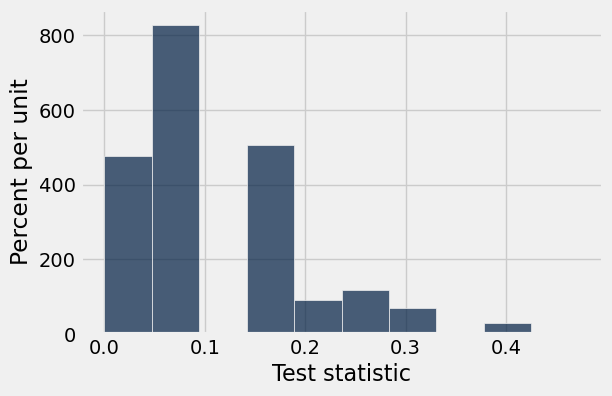

In [69]:
stats = make_array()

for i in np.arange(1000):
    stats = np.append(stats, distance(one_shuffle(coke), 'Shuffled'))

Table().with_column('Test statistic', stats).hist()

Idenfify on the graph which areas correspond to the p-value. Then write a single line of code the evaluates this p-value. 

What should be the conclusion of this test? If you were a doctor, would you recommend the Lithium treatment to your patients? 